# The cadmium question 

*The element maps produced by the Bruker software show a cadmium (Cd) map that is suspicously similar to the lead (Pb) map. Is this a 'feature' or evidence of actual presence of cadmium?* 

Out local XRF guru Luc Megens just told me over lunch that the location of the cadmium K alpha peak corresponds with a sum peak of lead Pb_La + Pb_Lb. Let's try to confirm this.  

In [22]:
import moseley as mos
import numpy as np

In [2]:
cadmium = mos.XFluo('Cd', tube_keV=50)

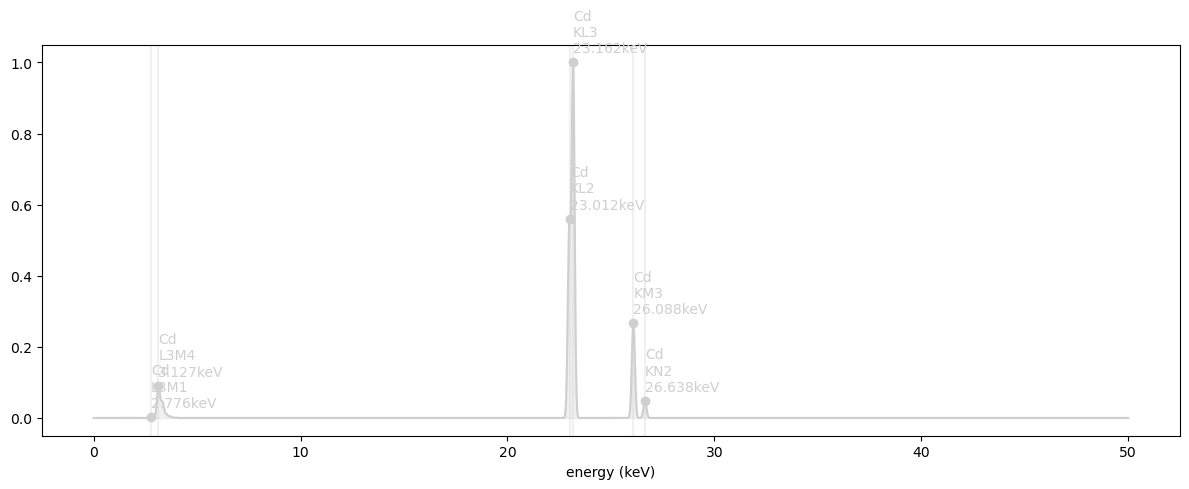

In [6]:
cadmium.plot(peak_labels='full')

Here are the significant peaks in the cadmium emission spectrum. 

In [15]:
cadmium.peak_excits

['L3M1', 'L3M4', 'KL2', 'KL3', 'KM3', 'KN2']

In [24]:
idx = np.argmax(cadmium.peak_intensities)
idx

3

The energy of the most prominent peak (Cd_Ka) is: 

In [27]:
Cd_Ka = cadmium.peak_energies[idx] # keV
Cd_Ka

23.161580790395195

Ok, now let's see if this peak coincides with Pb_La + Pb_Lb...

In [28]:
lead = mos.XFluo('Pb', tube_keV=50)

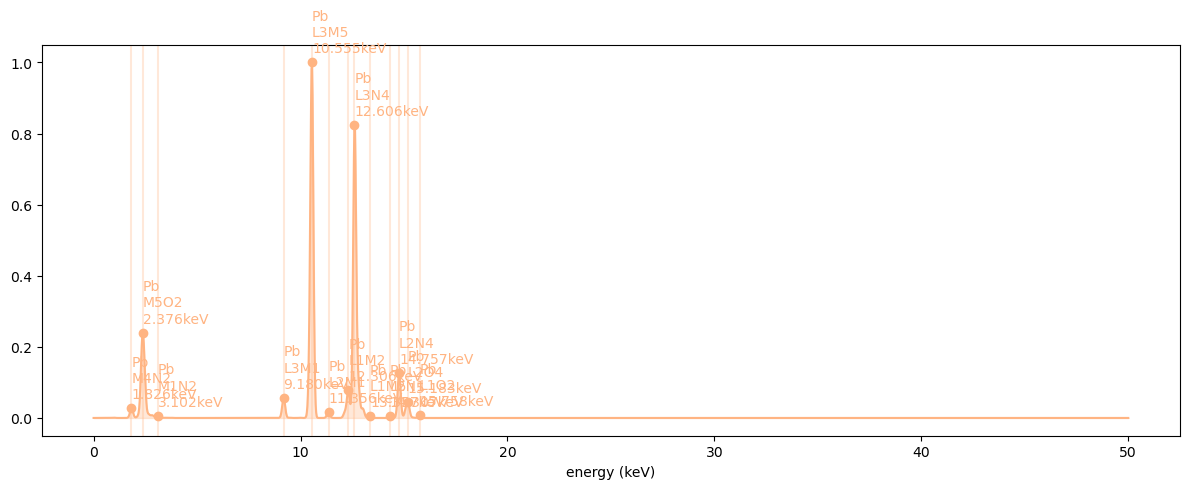

In [29]:
lead.plot(peak_labels='full')

In [33]:
lead.peak_intensities

array([0.02749354, 0.2402585 , 0.00579116, 0.05654369, 1.        ,
       0.01691136, 0.07778817, 0.82425394, 0.00539678, 0.00438514,
       0.12683395, 0.0445839 , 0.00834541])

In [35]:
idxs = np.argsort(lead.peak_intensities)[::-1]
idxs

array([ 4,  7,  1, 10,  6,  3, 11,  0,  5, 12,  2,  8,  9])

In [36]:
Pb_La = lead.peak_energies[4]
Pb_Lb = lead.peak_energies[7]
Pb_La, Pb_Lb # keV

(10.555277638819408, 12.606303151575787)

In [37]:
Pb_La + Pb_Lb

23.161580790395195

**That is EXACTLY THE SAME energy!**